# **Case Study - Spam Detection**
  The main aim of this project is to demonstrate the basics of NaturalLanguage Processing (NLP) for a Text Classification problem.
  We will follow the steps mentioned below:
  1. Load the Given Data
  2. Exploratory Data Analysis
  3. Segregate the Inputs and Output,
  4. Split the data into Training and Testing Data
  5. **Data Transformation -** Apply data preparation on the `TrainingData
      - Text Preprocessing (special characters, stop words, lower case,stemming, etc)
      - Text Vectorization - Converting text to numerical vector using Bagof Words
  6. **Model Building -** Build the Model on Processed Train Data
  7. **Data Preparation -** Apply data preparation on the Testing Data
  8. **Prediction on Test Data -** Use the trained model to predict on testdata
  9. **Evaluation -** Calculate the score of model by matching model'sprediction with actual values
  **Major Steps Involved:**
  1. **Text Data Visualisation**
  2. **Text Data Preprocessing**
  3. **Text Data Vectorization - Text To Numerical Representation using Bagof Words**"

# Step 1 - Load the Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Learning/Gen AI/1. Working with Text Data and Text Embeddings/3. Case Sudy - Email Spam Filtering/email_data.csv')

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


# Step 2 - Exploratory Data Analysis

In [5]:
df.shape

(5171, 4)

2.a. Explore the Data Distribution of Target Variable

In [6]:
df['label'].value_counts()

,count
label,
ham,3672
spam,1499


In [7]:
df['label'].value_counts(normalize=True)

,proportion
label,
ham,0.710114
spam,0.289886


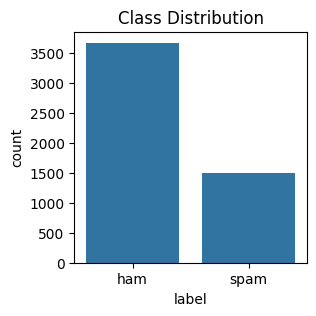

In [8]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title('Class Distribution')
sns.countplot(x='label', data=df)

plt.show()

2.b. Visualizing the distribution of most frequent words

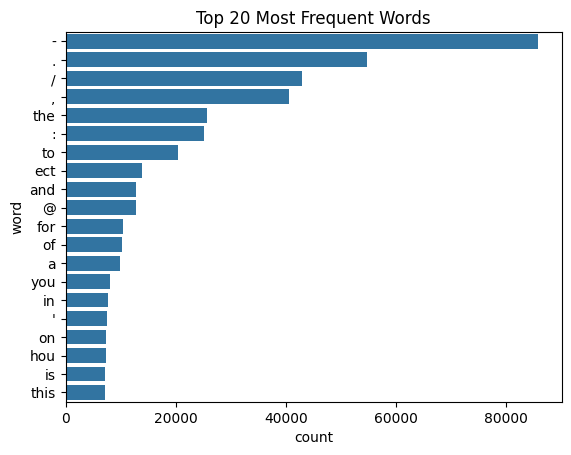

In [9]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df['text'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Top 20 Most Frequent Words')
plt.show()

In [10]:
common_words

[('-', 85723),
 ('.', 54681),
 ('/', 42848),
 (',', 40640),
 ('the', 25613),
 (':', 25104),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('@', 12735),
 ('for', 10505),
 ('of', 10167),
 ('a', 9813),
 ('you', 8159),
 ('in', 7699),
 ("'", 7542),
 ('on', 7308),
 ('hou', 7289),
 ('is', 7162),
 ('this', 7161)]

2.c. Classwise WordCloud - Explore the Relationships between each pair of Inputs and Output

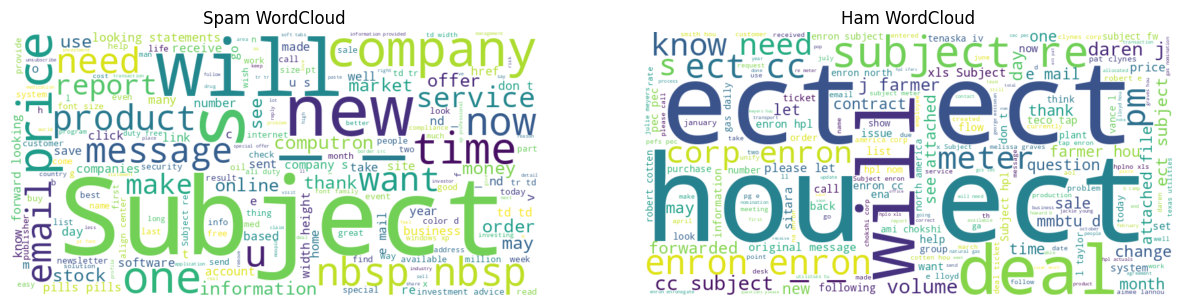

In [11]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_text = " ".join(df[df['label'] == 'spam']['text'].values)
spam_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Word cloud for ham messages
ham_text = " ".join(df[df['label'] == 'ham']['text'].values)
ham_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

#Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(spam_word_cloud, interpolation='bilinear')
ax[0].set_title('Spam WordCloud')
ax[0].axis('off')

ax[1].imshow(ham_word_cloud, interpolation='bilinear')
ax[1].set_title('Ham WordCloud')
ax[1].axis('off')

plt.show()

**Observations**

1. There is a clear need to preprocess the text data as most of the most frequent tokens are special characters and punctuations (i.e. cleaning).
2. There are words like 'Subject', 'ect', 'hou', 'eron', 'message', etc... which looks dominating.

# Data Preparation and Model Building Pipeline

1. Segregate the Inputs (X) and Output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and   Feature Engineering.
 - Clean the training data
 - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance

# Step 3 - Segregate Inputs (X) and Output (y)

In [12]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [13]:
y = df['label']
X = df[['text']]

# Step 4 - Split the data into Train and Test

In [14]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4136, 1) (4136,)
(1035, 1) (1035,)


# Step 5 - Apply Data Preparation on Training Data

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def clean(doc):

  # define a regex to match special characters and digits
  regex = "[^a-zA-Z.]"
  doc = re.sub(regex," ",doc)

  # convert to lowercase
  doc = doc.lower()

  # tokenization
  tokens = nltk.word_tokenize(doc)

  # stop word removal
  stop_words=list(set(stopwords.words('english')))
  custom_stop_words = ['subject', 'ect', 'hou', 'eron', 'message', 'nbsp']
  stop_words = stop_words + custom_stop_words
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # join and return tokens
  return " ".join(lemmatized_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
def tokenizer(doc):
  # Tokenization
  return nltk.word_tokenize(doc)

In [17]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vector
bow_vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1,1),
                           lowercase=False,
                           preprocessor=clean,
                           stop_words=None)

# use it to extract features from the training data
%time X_train_transformed = bow_vect.fit_transform(X_train['text'])

print(f"Shape of X_train_transformed (# of docs, # of unqique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

CPU times: user 24.3 s, sys: 442 ms, total: 24.8 s
Wall time: 30.8 s
Shape of X_train_transformed (# of docs, # of unqique vocabulary): (4136, 38739)
Type of X_train_transformed (Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['.' 'aa' 'aaa' 'aabda' 'aabvmmq' 'aac' 'aachecar' 'aaer' 'aafco'
 'aaigrcrb']


In [18]:
pd.DataFrame(X_train_transformed.toarray(), columns=bow_vect.get_feature_names_out()).head()

,.,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaigrcrb,...,zyl,zynsdirnh,zynve,zyqtaqlt,zyrtec,zzezrjok,zzn,zzo,zzocb,zzsyt
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print(bow_vect.vocabulary_)

{'april': 1906, 'activity': 392, 'survey': 33274, 'starting': 32611, 'collect': 7208, 'data': 9102, '.': 0, 'attached': 2435, 'drive': 10907, 'cost': 8198, 'commercial': 7341, 'team': 33785, 'please': 26703, 'select': 30907, 'rcs': 28569, 'fill': 13476, 'driver': 10911, 'quantity': 28192, 'requested': 29248, 'month': 23141, 'february': 13243, 'number': 24450, 'rc': 28560, 'end': 11944, 'day': 9144, 'thursday': 34282, 'may': 22026, 'th': 34068, 'group': 15552, 'currently': 8763, 'generates': 14753, 'standard': 32575, 'report': 29204, 'capture': 5605, 'surveyed': 33275, 'send': 30957, 'put': 27906, 'recipient': 28707, 'list': 20875, 'beginning': 3395, 'next': 23990, 'eliminate': 11689, 'need': 23826, 'every': 12589, 'would': 37671, 'like': 20772, 'u': 35315, 'information': 17981, 'someone': 32085, 'within': 37472, 'let': 20635, 'know': 19886, 'contact': 7862, 'lisa': 20864, 'cousino': 8291, 'x': 37852, 'unable': 35476, 'complete': 7459, 'allotted': 1166, 'time': 34360, 'thanks': 34085, '

# Step 7 - Apply Data Preparation on Test Data

In [20]:
X_test_transformed = bow_vect.transform(X_test['text'])

print(f"Shape of X_test_transformed (# of docs, # of unqique vocabulary): {X_test_transformed.shape}")

Shape of X_test_transformed (# of docs, # of unqique vocabulary): (1035, 38739)


# Step 6, 8 and 9 - Training and Testing Phase

a. Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB()
%time classifier.fit(X_train_transformed, y_train)

#Predicting on train data
y_train_pred = classifier.predict(X_train_transformed)
print(f"Model Training Accuracy: {metrics.accuracy_score(y_train, y_train_pred)}")

#Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)
print(f"Model Testing Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")


CPU times: user 32.7 ms, sys: 785 µs, total: 33.5 ms
Wall time: 73.7 ms
Model Training Accuracy: 0.9869439071566731
Model Testing Accuracy: 0.9758454106280193


b. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

#Predicting on train data
y_train_pred = classifier.predict(X_train_transformed)
print(f"Model Training Accuracy: {metrics.accuracy_score(y_train, y_train_pred)}")

#Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)
print(f"Model Testing Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: user 2.91 s, sys: 901 ms, total: 3.81 s
Wall time: 2.91 s
Model Training Accuracy: 0.9995164410058027
Model Testing Accuracy: 0.9816425120772947


c. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on train data
y_train_pred = classifier.predict(X_train_transformed)
print(f"Model Training Accuracy: {metrics.accuracy_score(y_train, y_train_pred)}")

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)
print(f"Model Testing Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: user 1.87 s, sys: 2.78 ms, total: 1.87 s
Wall time: 5.37 s
Model Training Accuracy: 1.0
Model Testing Accuracy: 0.9497584541062802


d. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on train data
y_train_pred = classifier.predict(X_train_transformed)
print(f"Model Training Accuracy: {metrics.accuracy_score(y_train, y_train_pred)}")

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)
print(f"Model Testing Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: user 6.15 s, sys: 14 ms, total: 6.16 s
Wall time: 8.89 s
Model Training Accuracy: 1.0
Model Testing Accuracy: 0.9739130434782609
